<a href="https://colab.research.google.com/github/ZaraPa/Medical-data/blob/main/Clalit_data_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from IPython.display import display, HTML

# Load data
file_path = "Med Data.csv"
df = pd.read_csv(file_path)

print(df.head(1), "\n\n")
df.info()


     ID   Disease  Age   Sex  Blood Pressure  Sport Activity Level       BMI  \
0  9292  Diabetes   65  Male        8.078688              1.226998  8.654499   

   Alcohol Consumption  Cholesterol Level Family History of Disease  \
0             6.616191           9.809791                       Yes   

  Medication Use Occupation Type  Sleep Hours per Night  Stress Level  
0            Yes          Manual               4.502498      3.272403   


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10311 entries, 0 to 10310
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         10311 non-null  int64  
 1   Disease                    10311 non-null  object 
 2   Age                        10311 non-null  int64  
 3   Sex                        10189 non-null  object 
 4   Blood Pressure             10311 non-null  float64
 5   Sport Activity Level       10311 non-null  

In [2]:
# Load categorical
numerical_cols = df.select_dtypes(exclude=['object', 'category', 'string']).columns.to_list()
categorical_cols = df.select_dtypes(include=['object', 'category', 'string']).columns.to_list()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['ID', 'Age', 'Blood Pressure', 'Sport Activity Level', 'BMI', 'Alcohol Consumption', 'Cholesterol Level', 'Sleep Hours per Night', 'Stress Level']
Categorical columns: ['Disease', 'Sex', 'Family History of Disease', 'Medication Use', 'Occupation Type']


In [3]:
# Drop rows with missing values and make a safe copy
df_cleaned = df.dropna().copy()

# Define numeric and categorical columns
numeric_cols = [
    'Age', 'Blood Pressure', 'Sport Activity Level', 'BMI',
    'Alcohol Consumption', 'Cholesterol Level', 'Sleep Hours per Night', 'Stress Level']

categorical_cols = ['Sex', 'Family History of Disease', 'Medication Use', 'Occupation Type']




1. Age


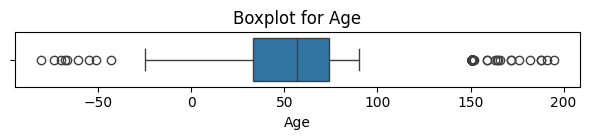


2. Blood Pressure


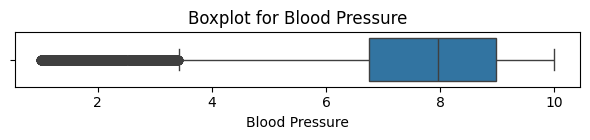


3. Sport Activity Level


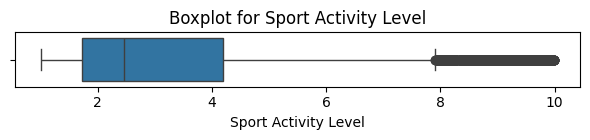


4. BMI


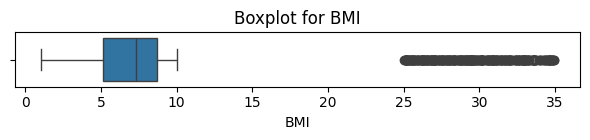


5. Alcohol Consumption


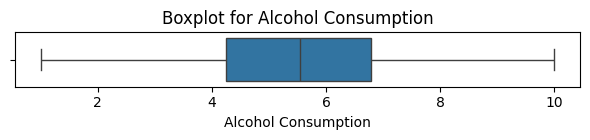


6. Cholesterol Level


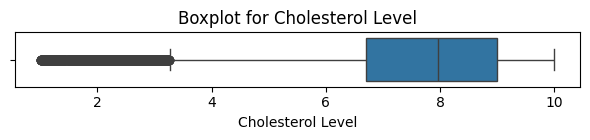


7. Sleep Hours per Night


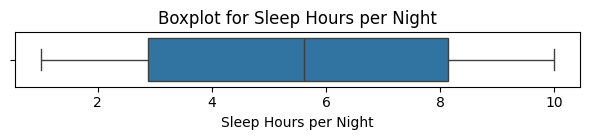


8. Stress Level


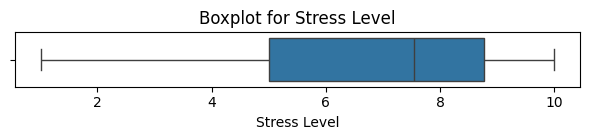

In [4]:
# @title Boxplots and outlier detection using IQR for numerical columns
for ind, col in enumerate(numeric_cols):
  # IQR outlier detection
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]

    # Boxplot
    print(f"\n{ind+1}. {col}")
    # print(f"Outliers in '{col}' (below {lower:.2f} or above {upper:.2f}):")

    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df_cleaned[col], orient='h')
    plt.title(f"Boxplot for {col}")
    plt.tight_layout()
    plt.show()
    # display(outliers)

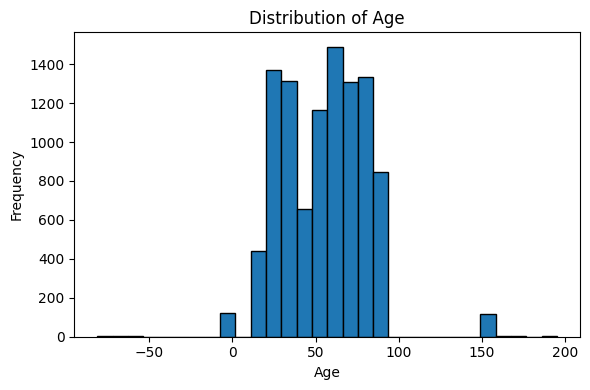

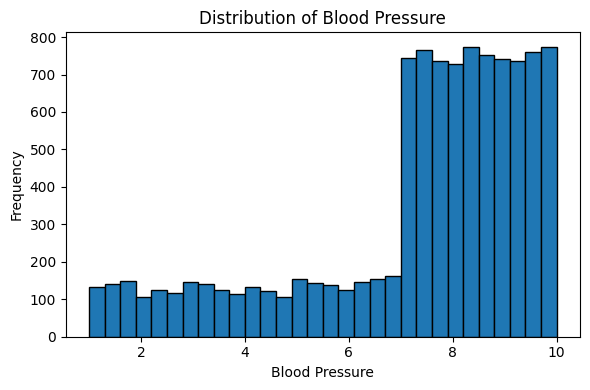

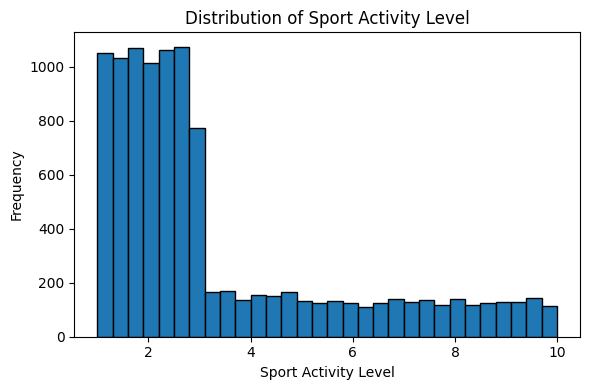

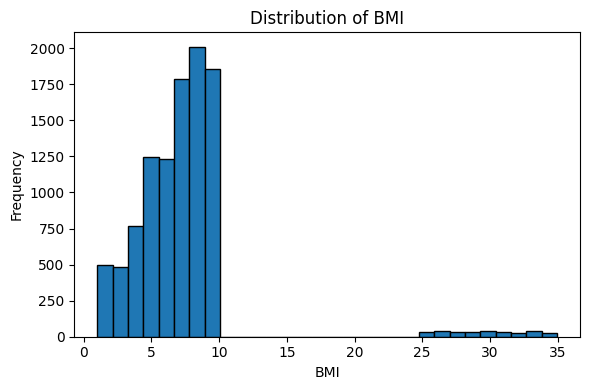

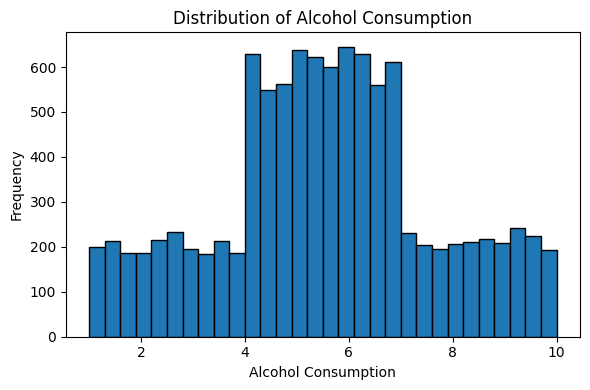

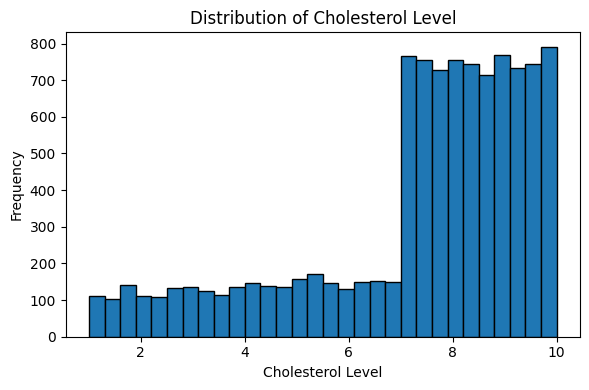

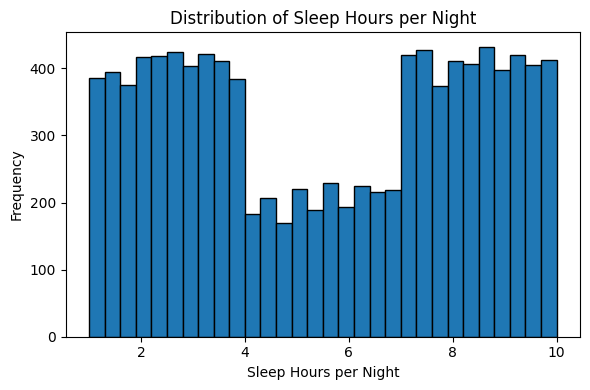

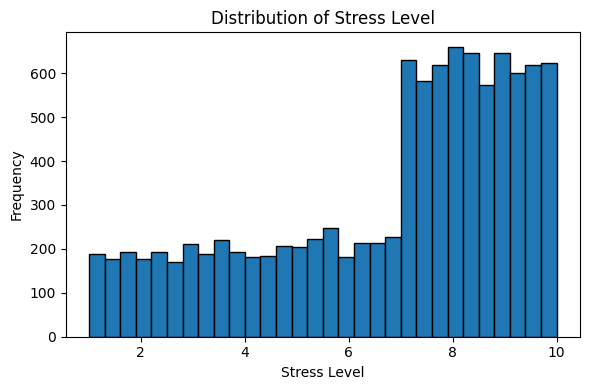

In [5]:
# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(df_cleaned[col], bins=30, edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

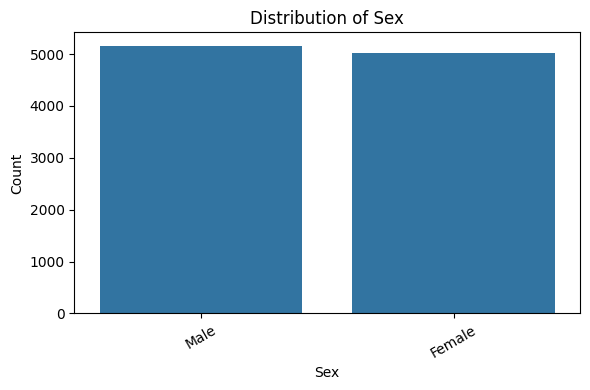

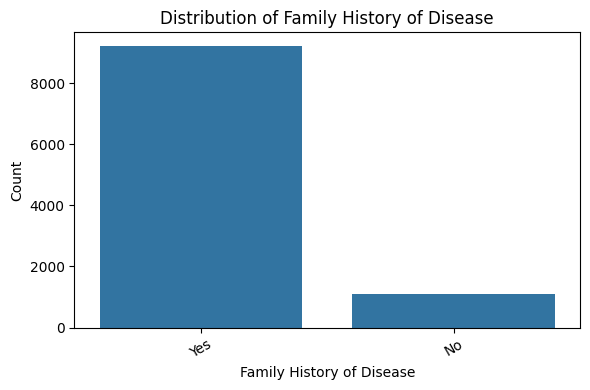

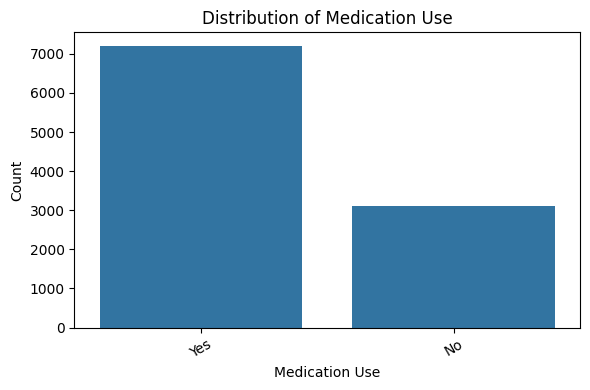

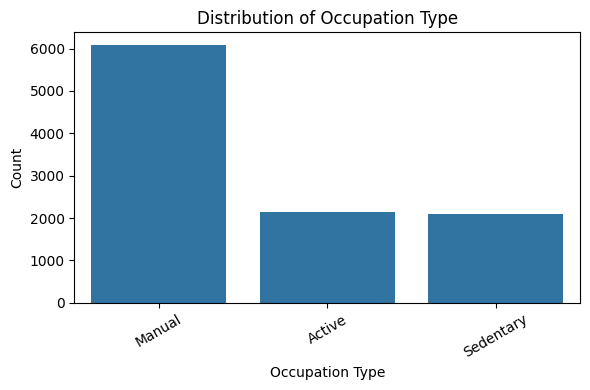

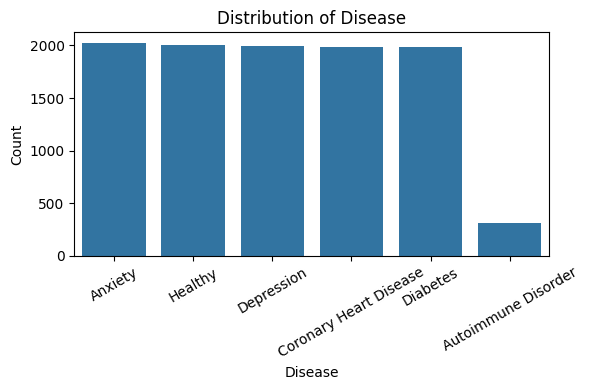

In [6]:
# Use original (non-encoded) categorical values from the original DataFrame
for col in categorical_cols + ['Disease']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=30)  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

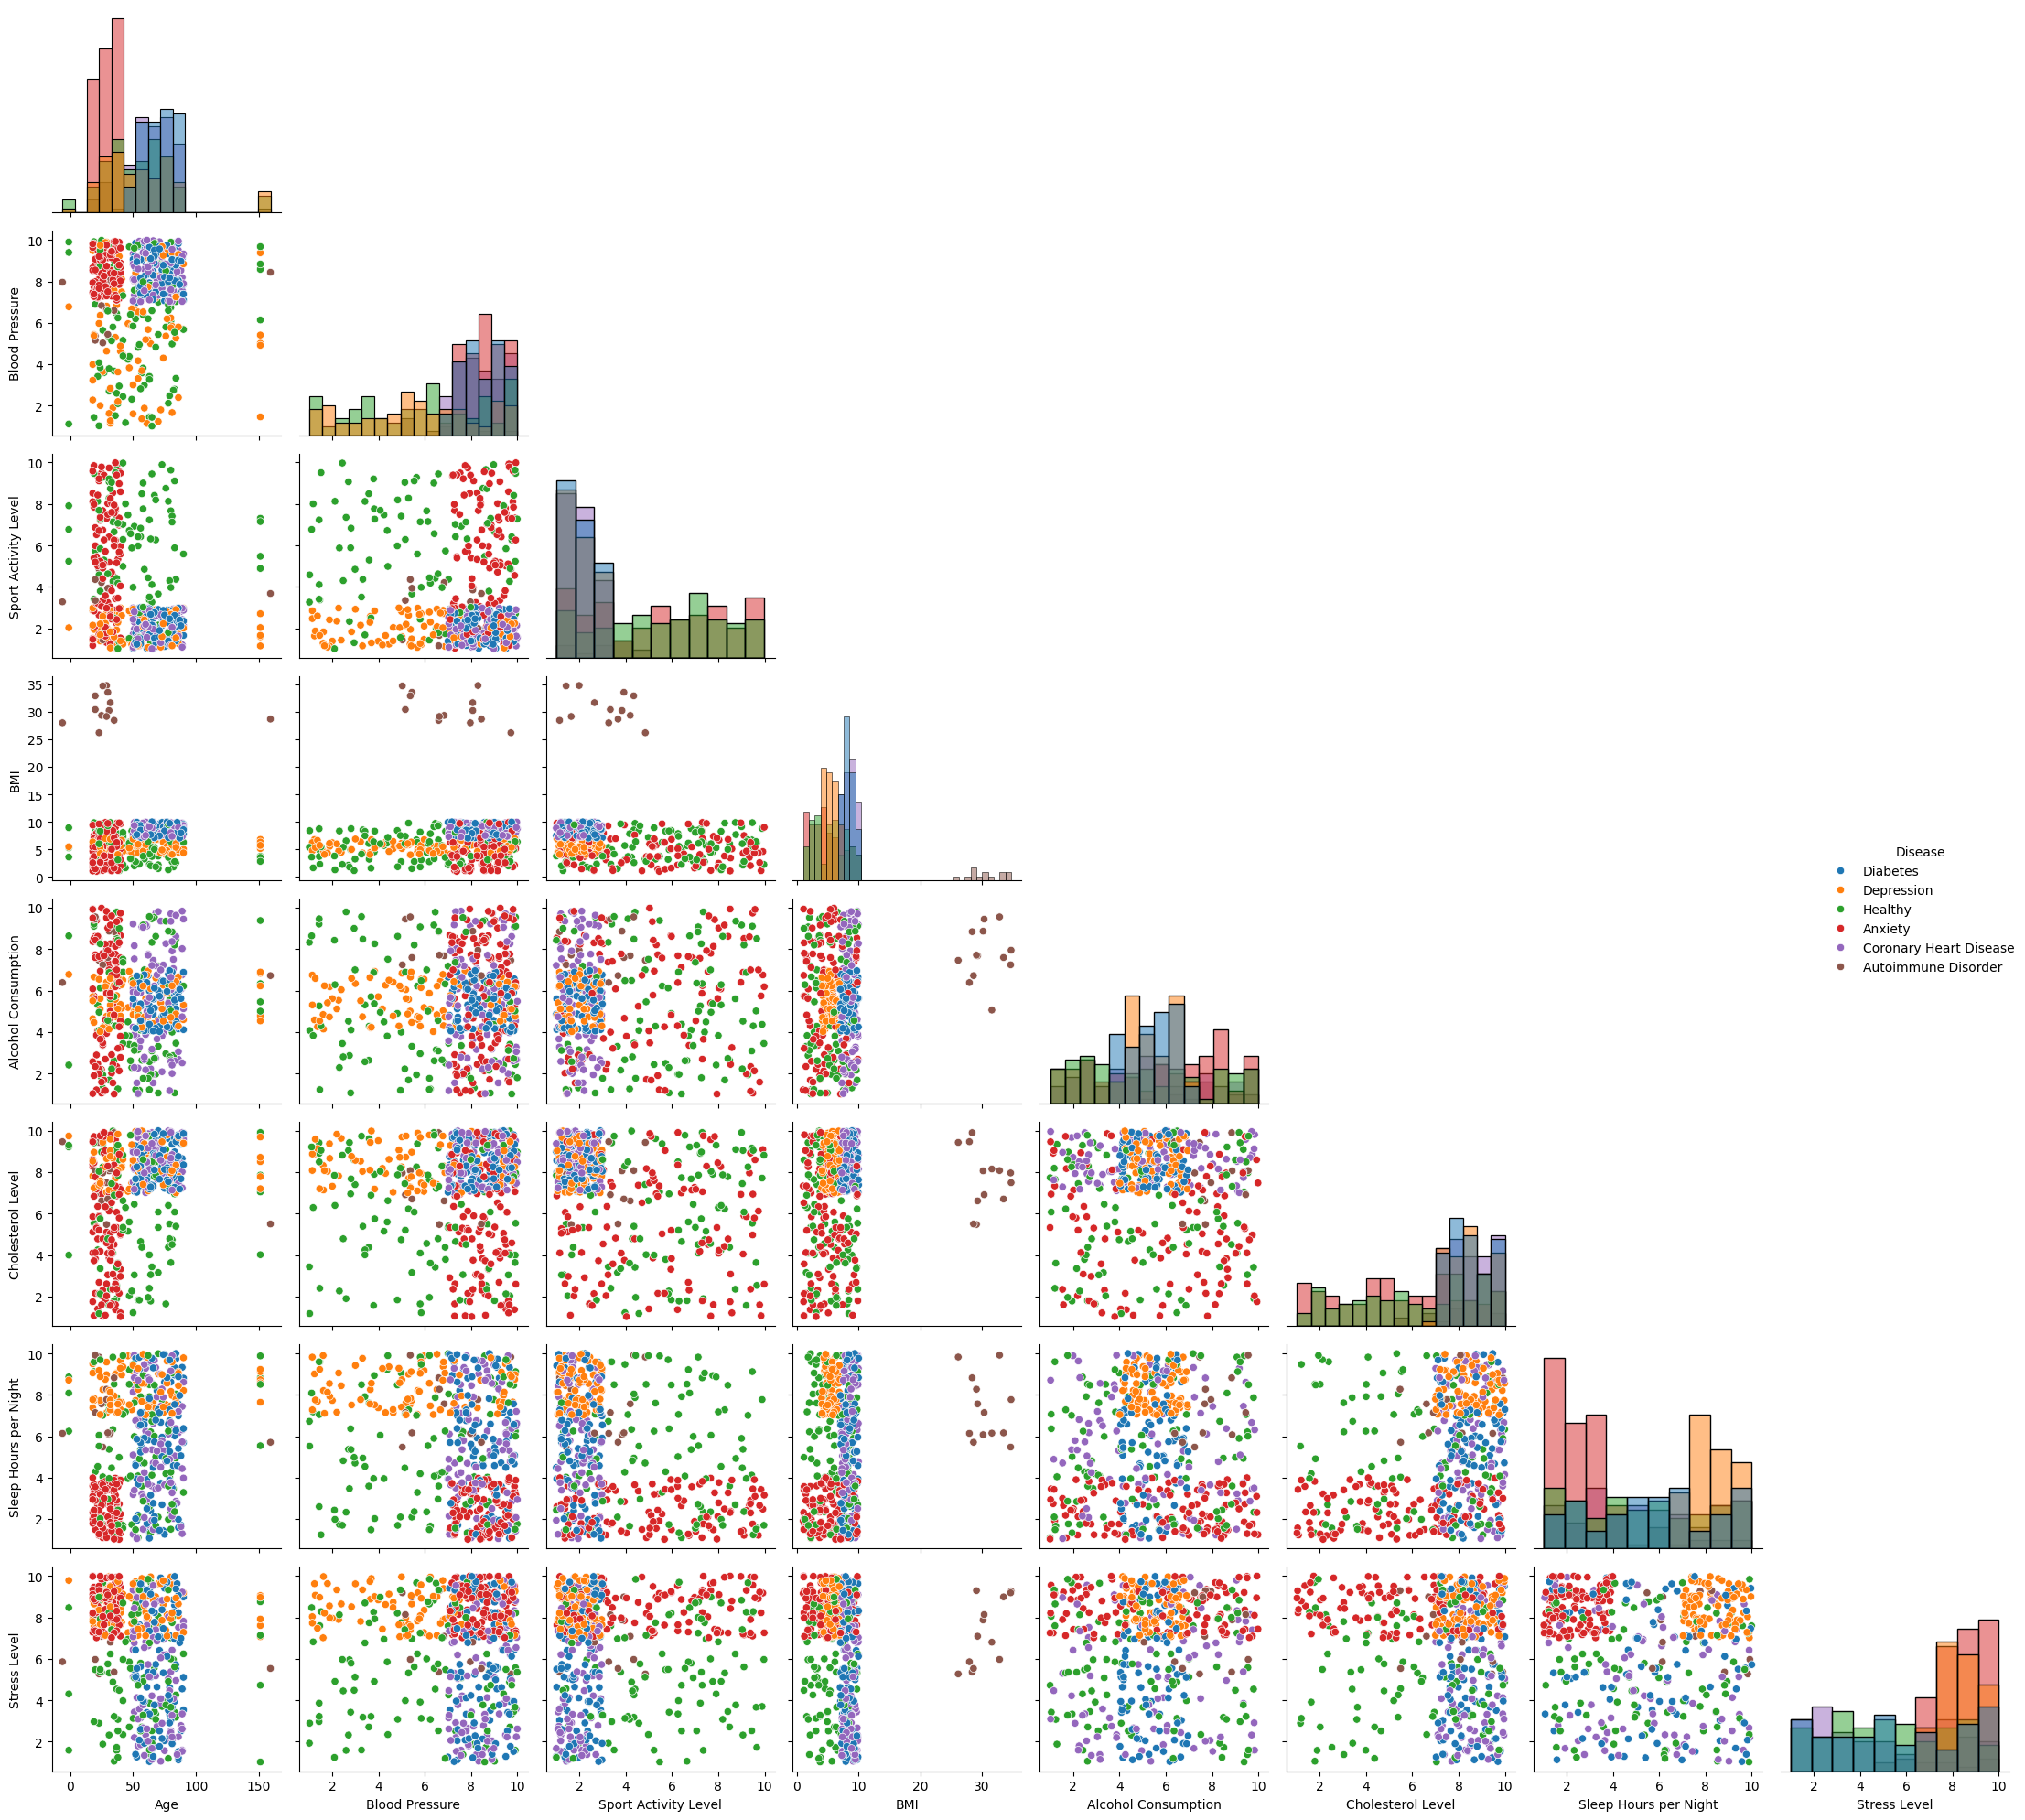

In [7]:
# Prepare for pairplot
df_cleaned['Disease'] = df_cleaned['Disease'].astype(str)
all_features = numeric_cols + categorical_cols

# Pairplot (sampled for performance)
sampled_df = df_cleaned.sample(n=500, random_state=1)
sns.pairplot(sampled_df[all_features + ['Disease']], hue='Disease', corner=True, diag_kind='hist')
plt.tight_layout()
plt.show()

In [8]:
# Identify rows with missing values
rows_with_na = df[df.isna().any(axis=1)].copy()

# Step 2: Function to bold missing values
def bold_missing_values(val):
    return '<b style="color:orange;">NaN</b>' if pd.isna(val) else val

# Step 3: Apply to entire DataFrame
styled_rows = rows_with_na.applymap(bold_missing_values)

# Step 4: Display with HTML formatting
display(HTML(styled_rows.to_html(escape=False, index=False)))


/tmp/ipython-input-8-522302294.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  styled_rows = rows_with_na.applymap(bold_missing_values)



=== Epoch 1 ===
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8

=== Epoch 2 ===
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8

=== Epoch 3 ===
Processing chunk 1
Processing chunk 2
Processing chunk 3
Processing chunk 4
Processing chunk 5
Processing chunk 6
Processing chunk 7
Processing chunk 8


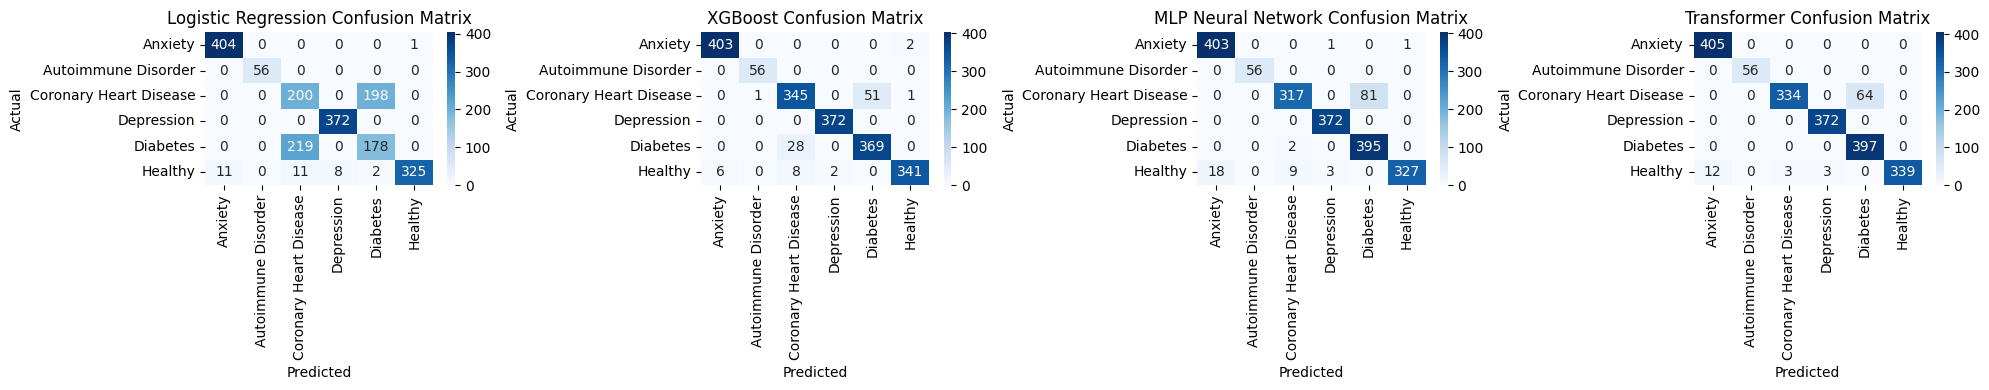

  Metric  Logistic Regression  XGBoost  MLP Neural Net  Transformer
Accuracy                0.773    0.950           0.942        0.959
Log Loss                0.413    0.223           0.227        0.000


In [9]:
# === Imports ===
# General-purpose data science and visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Machine learning and deep learning libraries
import xgboost as xgb
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

# Scikit-learn tools
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.exceptions import ConvergenceWarning
import warnings

# === Parameters ===
chunk_size = 1000  # For reading and processing large datasets in smaller batches
n_epochs = 3       # Number of times to iterate over the entire training data

# === Label Encoders Initialization ===
label_encoders = {col: LabelEncoder() for col in categorical_cols}  # For encoding categorical features
target_encoder = LabelEncoder()  # For target variable 'Disease'
encoders_fitted = False          # Ensures encoders are fitted only once
target_classes = None           # Holds class names for final metrics

# === Model Initialization ===
scaler = StandardScaler()        # For normalizing numeric features
scaler_cat = StandardScaler()    # For scaling encoded categorical features
log_reg_model = SGDClassifier(loss='log_loss', random_state=42, warm_start=True)  # Online logistic regression
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50),
                          activation='relu',
                          batch_size=256, max_iter=1, warm_start=True, random_state=42)  # Shallow MLP
booster = None                   # XGBoost booster instance
transformer_model = None         # Transformer model instance
optimizer = None
criterion = nn.CrossEntropyLoss()  # For transformer loss

# === Transformer Model ===
class ChunkTransformer(nn.Module):
    def __init__(self, cat_cardinalities, num_numeric, d_model=64, nhead=4, num_layers=2, num_classes=3):
        super().__init__()
        # Embedding for each categorical feature
        self.cat_embeddings = nn.ModuleList([nn.Embedding(card, d_model) for card in cat_cardinalities])
        # Trainable projection from numeric features to embedding space
        self.numeric_scalers = nn.Parameter(torch.randn(num_numeric, d_model))
        # Standard transformer encoder
        self.transformer = nn.TransformerEncoder(
            nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True),
            num_layers=num_layers)
        # Classification head
        self.cls_head = nn.Linear(d_model, num_classes)

    def forward(self, x_cat, x_num):
        # Embed categorical features
        emb = [emb_layer(x_cat[:, i]) for i, emb_layer in enumerate(self.cat_embeddings)]
        emb_cat = torch.stack(emb, dim=1)
        # Project numeric features
        scaled_num = torch.einsum('bd,df->bf', x_num, self.numeric_scalers).unsqueeze(1)
        # Concatenate categorical embeddings and numeric projections
        x = torch.cat([emb_cat, scaled_num], dim=1)
        x = self.transformer(x)
        return self.cls_head(x.mean(dim=1))

# === Data Preparation ===
# Load and filter data, handle outliers and categorical sanitization
df_all = pd.read_csv(file_path).dropna()
df_filtered = df_all[df_all['Age'].between(0, 120)].copy()
binary_gender = ['Male', 'Female']
df_filtered['Sex'] = df_filtered['Sex'].apply(lambda x: x if x in binary_gender else 'Other')

# Split into train/test
df_train, df_test = train_test_split(df_filtered, test_size=0.2, stratify=df_filtered['Disease'], random_state=42)
df_train.to_csv("train_temp.csv", index=False)
df_test.to_csv("test_temp.csv", index=False)

# === Training Loop ===
# Iterates over dataset in chunks to simulate streaming / online learning
for epoch in range(n_epochs):
    print(f"\n=== Epoch {epoch + 1} ===")
    for i, chunk in enumerate(pd.read_csv("train_temp.csv", chunksize=chunk_size)):
        print(f"Processing chunk {i + 1}")
        chunk = chunk.dropna().copy()
        if chunk.empty:
            continue

        # Label encoding for categorical features and target
        for col in categorical_cols:
            if not encoders_fitted:
                label_encoders[col].fit(chunk[col])
            chunk[col] = label_encoders[col].transform(chunk[col])
        if not encoders_fitted:
            target_encoder.fit(chunk['Disease'])
            target_classes = target_encoder.classes_
        chunk['Disease'] = target_encoder.transform(chunk['Disease'])
        encoders_fitted = True

        # Normalize numeric features
        y_chunk = chunk['Disease']
        if epoch == 0 and i == 0:
            scaler.fit(chunk[numeric_cols])
            scaler_cat.fit(chunk[categorical_cols])
        chunk[numeric_cols] = scaler.transform(chunk[numeric_cols])
        X_chunk_scaled = np.hstack([
            scaler_cat.transform(chunk[categorical_cols]),
            chunk[numeric_cols].values
        ])

        # Train Logistic Regression (SGD-based)
        if epoch == 0 and i == 0:
            log_reg_model.partial_fit(X_chunk_scaled, y_chunk, classes=np.unique(y_chunk))
        else:
            log_reg_model.partial_fit(X_chunk_scaled, y_chunk)

        # Train MLP (shallow neural net)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning)
            warnings.filterwarnings("ignore", message="Got `batch_size` less than 1 or larger than sample size.*")
            mlp_model.fit(X_chunk_scaled, y_chunk)

        # Train XGBoost (gradient-boosted trees)
        dtrain = xgb.DMatrix(X_chunk_scaled, label=y_chunk)
        booster = xgb.train({'objective': 'multi:softprob', 'num_class': len(target_classes),
                             'eval_metric': 'mlogloss', 'tree_method': 'hist'},
                            dtrain, num_boost_round=10, xgb_model=booster)

        # Train Transformer
        X_cat = torch.tensor(chunk[categorical_cols].values, dtype=torch.long)
        X_num = torch.tensor(chunk[numeric_cols].values, dtype=torch.float32)
        y_torch = torch.tensor(y_chunk.values, dtype=torch.long)
        if transformer_model is None:
            cat_cardinalities = [len(label_encoders[col].classes_) for col in categorical_cols]
            transformer_model = ChunkTransformer(cat_cardinalities, len(numeric_cols), num_classes=len(target_classes))
            optimizer = torch.optim.Adam(transformer_model.parameters(), lr=1e-3)
        transformer_model.train()
        loader = DataLoader(TensorDataset(X_cat, X_num, y_torch), batch_size=64, shuffle=True)
        for xb_cat, xb_num, yb in loader:
            optimizer.zero_grad()
            out = transformer_model(xb_cat, xb_num)
            loss = criterion(out, yb)
            loss.backward()
            optimizer.step()

# === Evaluation: Transformer ===
# Evaluates the transformer model on test chunks
def evaluate_transformer(model, test_file, chunk_size):
    model.eval()
    correct, total, total_loss = 0, 0, 0.0
    cm = None
    with torch.no_grad():
        for chunk in pd.read_csv(test_file, chunksize=chunk_size):
            chunk = chunk.dropna().copy()
            for col in categorical_cols:
                chunk[col] = label_encoders[col].transform(chunk[col])
            chunk['Disease'] = target_encoder.transform(chunk['Disease'])
            chunk[numeric_cols] = scaler.transform(chunk[numeric_cols])
            X_cat = torch.tensor(chunk[categorical_cols].values, dtype=torch.long)
            X_num = torch.tensor(chunk[numeric_cols].values, dtype=torch.float32)
            y = torch.tensor(chunk['Disease'].values, dtype=torch.long)
            out = model(X_cat, X_num)
            loss = criterion(out, y).item()
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += len(y)
            total_loss += loss
            c = confusion_matrix(y, pred.numpy(), labels=range(len(target_classes)))
            cm = c if cm is None else cm + c
    return {'acc': correct / total, 'loss': total_loss / total, 'cm': cm}

# === Evaluation: Other Models ===
# Generic evaluation for sklearn/XGBoost models
def evaluate_generic_model(predict_proba_fn, transform_fn, test_file, chunk_size):
    total_correct, total_loss, total_samples = 0, 0.0, 0
    confusion = None
    for chunk in pd.read_csv(test_file, chunksize=chunk_size):
        chunk = chunk.dropna().copy()
        for col in categorical_cols:
            chunk[col] = label_encoders[col].transform(chunk[col])
        chunk['Disease'] = target_encoder.transform(chunk['Disease'])
        X_chunk = chunk[categorical_cols + numeric_cols]
        y_chunk = chunk['Disease']
        X_input = transform_fn(X_chunk)
        y_proba = predict_proba_fn(X_input)
        y_pred = np.argmax(y_proba, axis=1)
        total_correct += (y_pred == y_chunk).sum()
        total_loss += log_loss(y_chunk, y_proba, labels=range(len(target_classes)), normalize=False)
        total_samples += len(y_chunk)
        cm = confusion_matrix(y_chunk, y_pred, labels=range(len(target_classes)))
        confusion = cm if confusion is None else confusion + cm
    return {'acc': total_correct / total_samples, 'loss': total_loss / total_samples, 'cm': confusion}

# === Run Evaluations ===
metrics_lr = evaluate_generic_model(
    log_reg_model.predict_proba,
    lambda df: np.hstack([scaler_cat.transform(df[categorical_cols]), scaler.transform(df[numeric_cols])]),
    "test_temp.csv", chunk_size
)
metrics_mlp = evaluate_generic_model(
    mlp_model.predict_proba,
    lambda df: np.hstack([scaler_cat.transform(df[categorical_cols]), scaler.transform(df[numeric_cols])]),
    "test_temp.csv", chunk_size
)
metrics_xgb = evaluate_generic_model(
    lambda arr: booster.predict(xgb.DMatrix(arr)),
    lambda df: np.hstack([scaler_cat.transform(df[categorical_cols]), scaler.transform(df[numeric_cols])]),
    "test_temp.csv", chunk_size
)
metrics_tf = evaluate_transformer(transformer_model, "test_temp.csv", chunk_size)

# === Plot Confusion Matrices ===
plt.figure(figsize=(20, 4))
for i, (metrics, title) in enumerate(zip(
    [metrics_lr, metrics_xgb, metrics_mlp, metrics_tf],
    ["Logistic Regression", "XGBoost", "MLP Neural Network", "Transformer"]
)):
    plt.subplot(1, 4, i + 1)
    sns.heatmap(metrics['cm'], annot=True, fmt="d", cmap="Blues",
                xticklabels=target_classes, yticklabels=target_classes)
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# === Print Summary ===
summary = pd.DataFrame({
    "Metric": ["Accuracy", "Log Loss"],
    "Logistic Regression": [round(metrics_lr['acc'], 3), round(metrics_lr['loss'], 3)],
    "XGBoost": [round(metrics_xgb['acc'], 3), round(metrics_xgb['loss'], 3)],
    "MLP Neural Net": [round(metrics_mlp['acc'], 3), round(metrics_mlp['loss'], 3)],
    "Transformer": [round(metrics_tf['acc'], 3), round(metrics_tf['loss'], 3)]
})
print(summary.to_string(index=False))

100%|===================| 11905/11910 [01:25<00:00]       

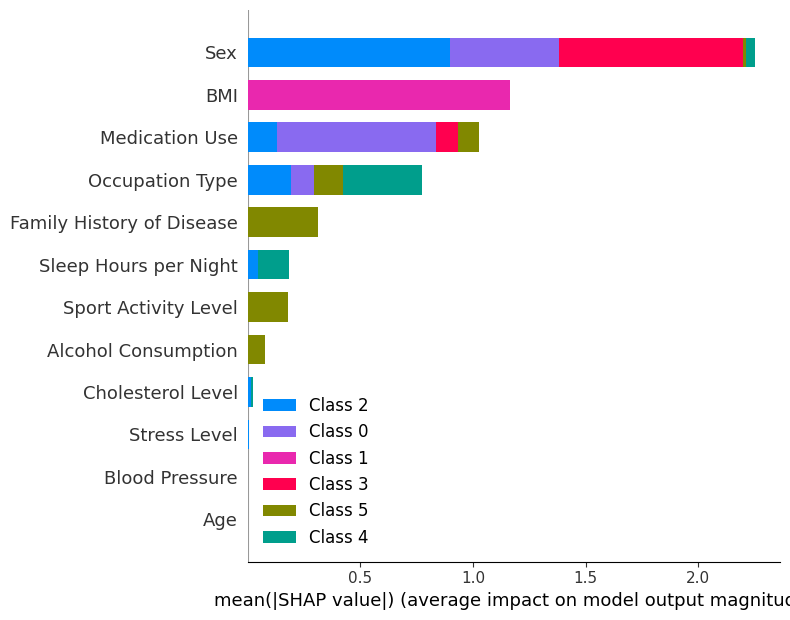

Class labels and indices: {0: 'Anxiety', 1: 'Autoimmune Disorder', 2: 'Coronary Heart Disease', 3: 'Depression', 4: 'Diabetes', 5: 'Healthy'}


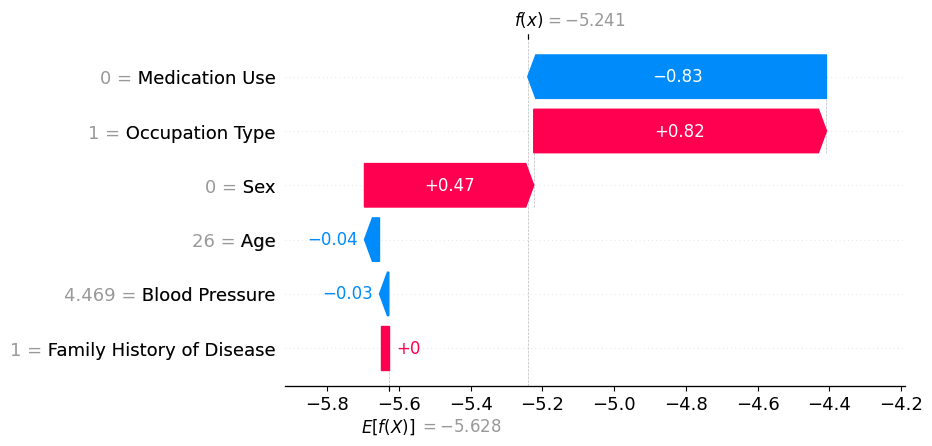

In [10]:
import shap

# === SHAP Analysis ===
# Step 1: Preprocess categorical columns in df_train and df_test
for col in categorical_cols:
    df_train[col] = label_encoders[col].transform(df_train[col])
    df_test[col] = label_encoders[col].transform(df_test[col])
df_train['Disease'] = target_encoder.transform(df_train['Disease'])
df_test['Disease'] = target_encoder.transform(df_test['Disease'])

# Step 2: Create SHAP explainer for XGBoost booster and training data
explainer = shap.Explainer(booster, df_train[categorical_cols + numeric_cols])

# Step 3: Explain predictions on test set
shap_values = explainer(df_test[categorical_cols + numeric_cols])  # shape: [num_samples, num_classes, num_features]

# Step 4: Global explanation — summary plot (for all classes together)
shap.summary_plot(shap_values, df_test[categorical_cols + numeric_cols])

# Step 5: Optional — check class names
class_names = list(target_encoder.classes_)
print("Class labels and indices:", dict(enumerate(class_names)))

# Step 6: Local explanation — one instance and one class
instance_idx = 0
class_idx = 0

# Step 7: Create Explanation object
single_shap = shap.Explanation(
    values=shap_values.values[instance_idx, class_idx],
    base_values=shap_values.base_values[instance_idx, class_idx],
    data=shap_values.data[instance_idx],
    feature_names=df_test[categorical_cols + numeric_cols].columns
)

# Step 8: Waterfall plot
shap.plots.waterfall(single_shap)

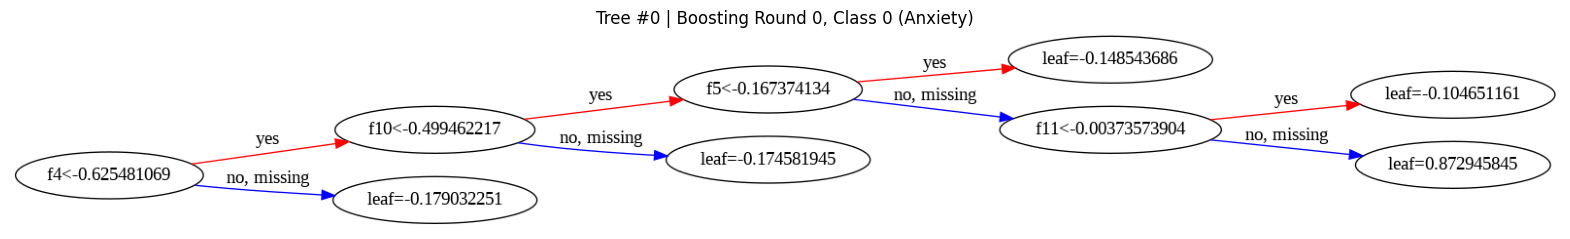

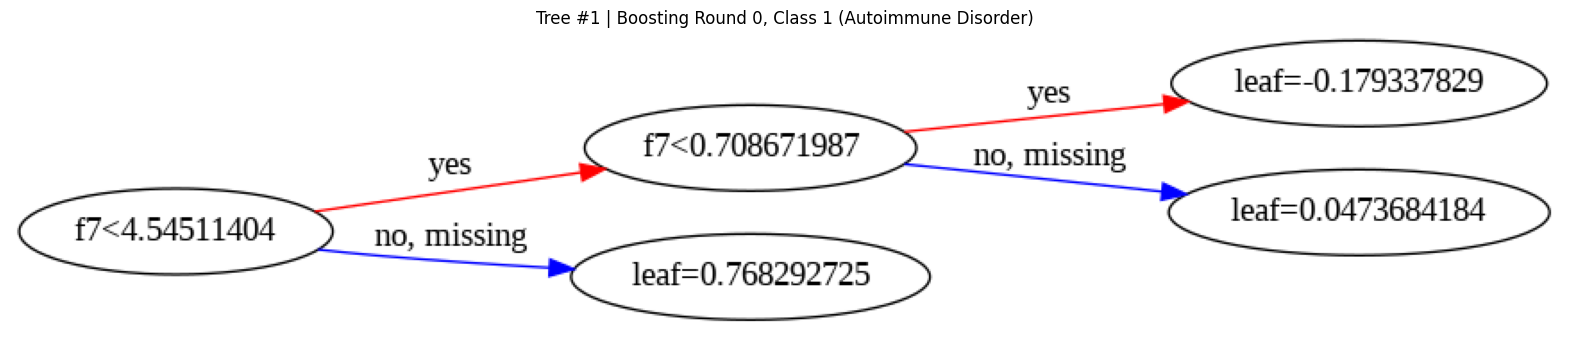

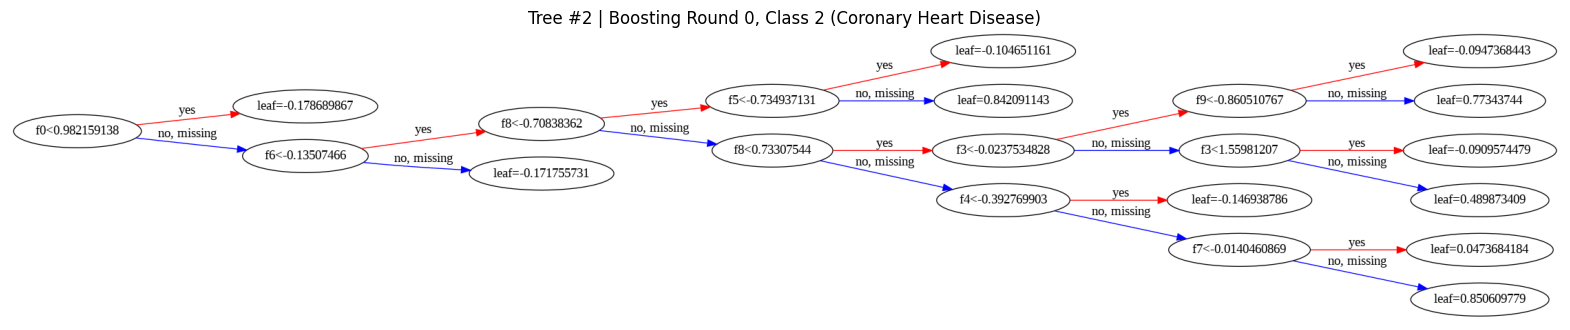

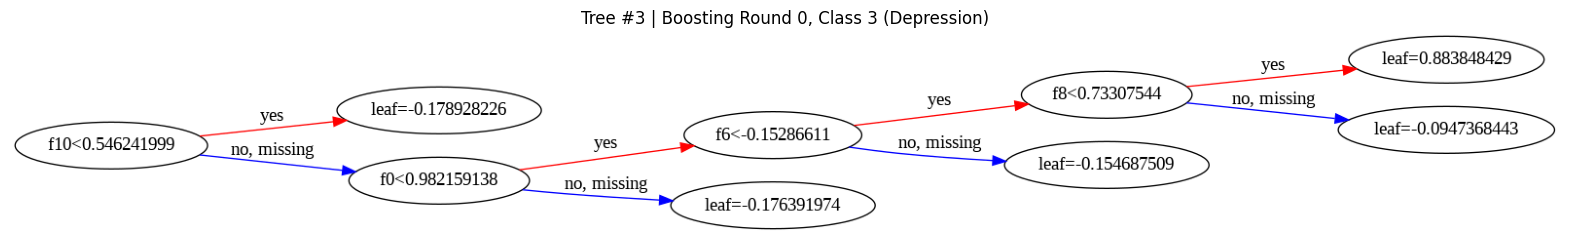

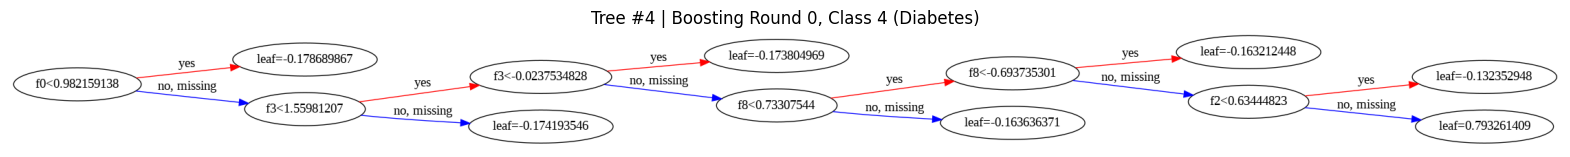

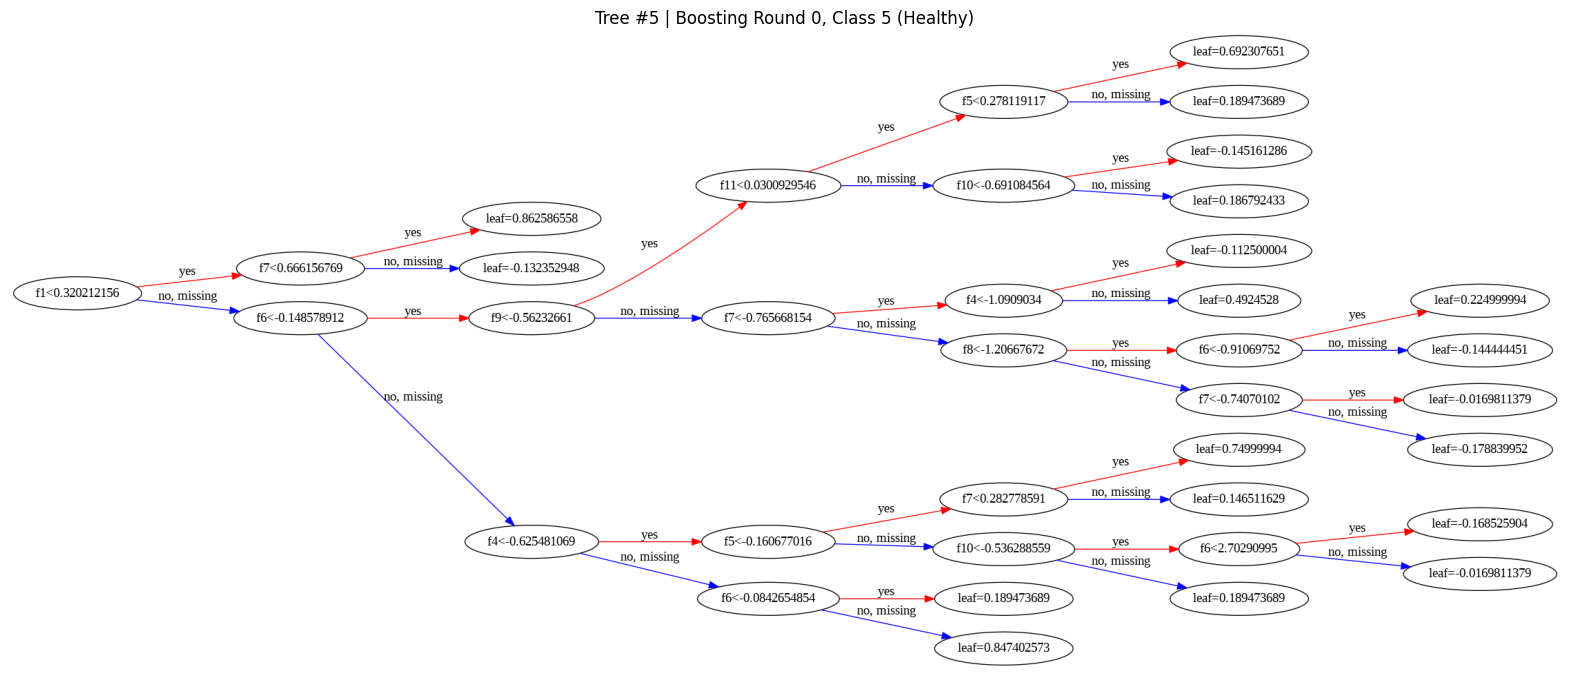

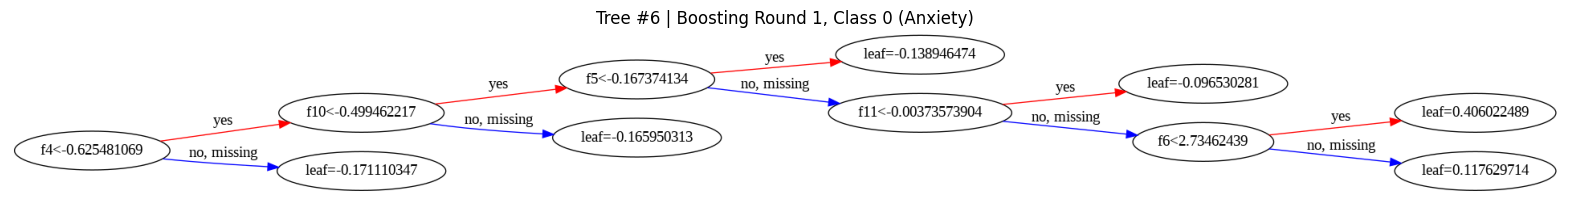

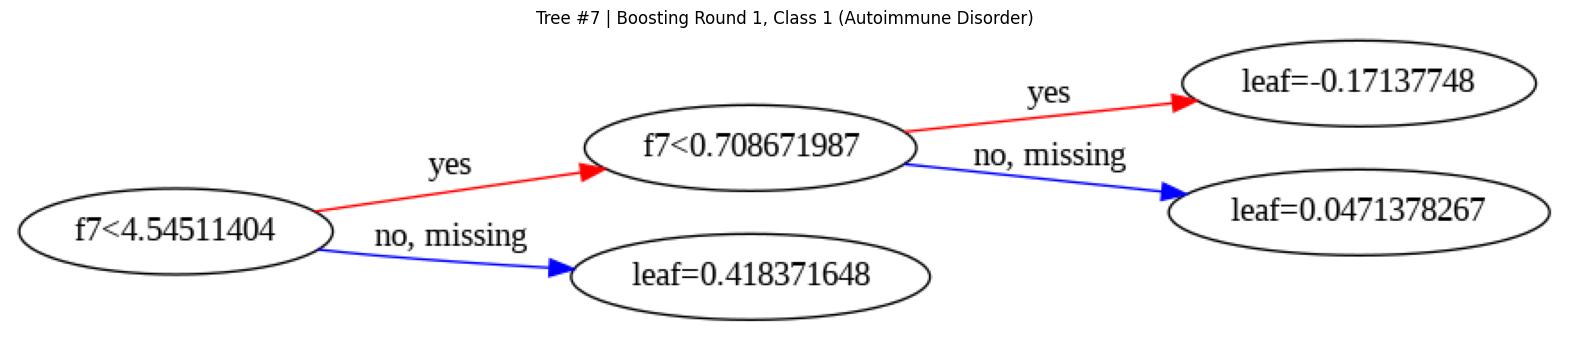

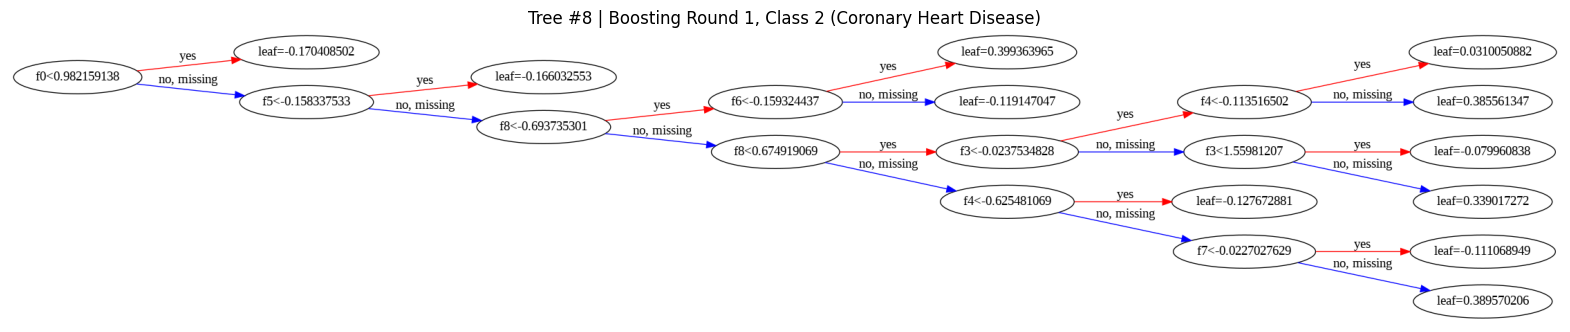

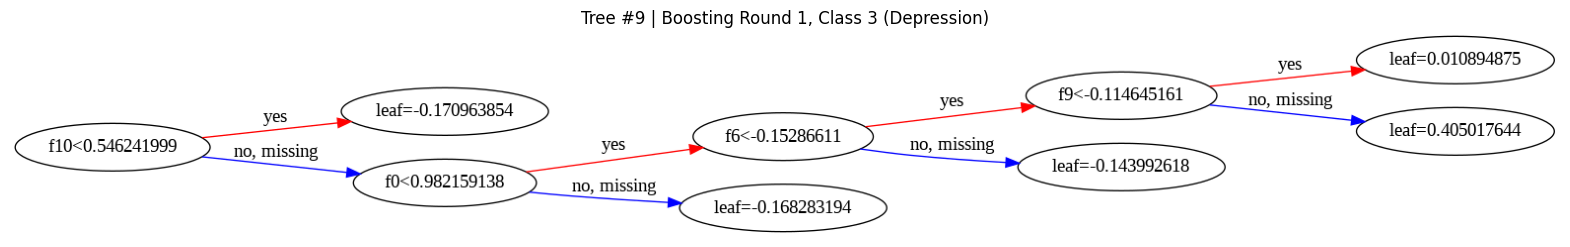

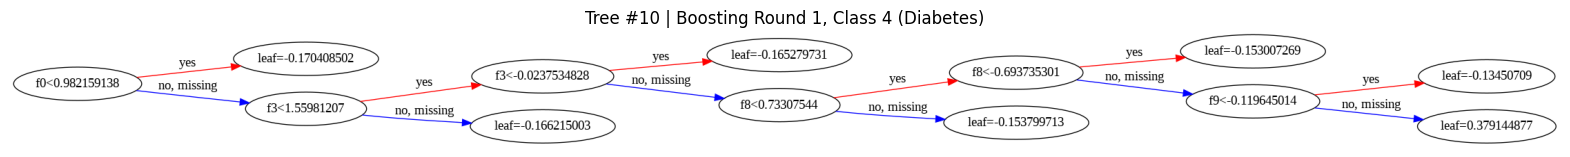

In [11]:
from xgboost import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# === XGBoost Tree Visualization ===
n_classes = len(np.unique(df_train['Disease']))
n_rounds = booster.num_boosted_rounds()
total_trees = n_rounds * n_classes

for i in range(total_trees):
    boosting_round = i // n_classes
    class_index = i % n_classes
    class_name = class_names[class_index]

    fig, ax = plt.subplots(figsize=(20, 10))
    plot_tree(booster, num_trees=i, rankdir='LR', ax=ax)
    plt.title(f"Tree #{i} | Boosting Round {boosting_round}, Class {class_index} ({class_name})")

    if i == 10:
        break